# %% [markdown]

 # ACPA Property Data Model in Process documentation

 **Initial steps**

 - Figure out how to make a satisfying markdown document
 to be able to keep track of progress (Done)
 - Get data from PACs for model training
   - Options:
       - Use current year sales to train
           - Probably not the move but might not be a bad place to start.
       - Use time adjusted sales to train
           - Time adjust using historical data, might not be too hard.
           - One year of sales probably isn't enough because it biases the model towards 2023-like market conditions
       - Use non time adjusted sales and year becomes a factor?
 - Identify less than 20 features to test for
   - Examples from Lee:
       - base area
       - age
       - neighborhood/market area
       - quality
       - land square ft
 - Do everything else

In [ ]:
# %%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("datapull1.csv") 

data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13691 entries, 0 to 13690
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   legal_acreage     11179 non-null  float64
 1   hood_cd           11179 non-null  float64
 2   map_id            11166 non-null  object 
 3   township_code     11179 non-null  object 
 4   range_code        11179 non-null  object 
 5   market_area_cd    11086 non-null  float64
 6   city_id           11179 non-null  float64
 7   yr_blt            11179 non-null  float64
 8   living_area       11179 non-null  float64
 9   land_type_cd      11178 non-null  object 
 10  condition_cd      10639 non-null  object 
 11  land_total_acres  11179 non-null  float64
 12  sl_price          11179 non-null  float64
 13  CENTROID_X        11179 non-null  float64
 14  CENTROID_Y        11179 non-null  float64
 15  Coord_Ratio       11179 non-null  float64
dtypes: float64(11), object(5)
memory usage: 

In [ ]:
# %%

data.dropna(inplace=True)

data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10587 entries, 0 to 11178
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   legal_acreage     10587 non-null  float64
 1   hood_cd           10587 non-null  float64
 2   map_id            10587 non-null  object 
 3   township_code     10587 non-null  object 
 4   range_code        10587 non-null  object 
 5   market_area_cd    10587 non-null  float64
 6   city_id           10587 non-null  float64
 7   yr_blt            10587 non-null  float64
 8   living_area       10587 non-null  float64
 9   land_type_cd      10587 non-null  object 
 10  condition_cd      10587 non-null  object 
 11  land_total_acres  10587 non-null  float64
 12  sl_price          10587 non-null  float64
 13  CENTROID_X        10587 non-null  float64
 14  CENTROID_Y        10587 non-null  float64
 15  Coord_Ratio       10587 non-null  float64
dtypes: float64(11), object(5)
memory usage: 1.4+ 

In [ ]:
# %%

from sklearn.model_selection import train_test_split

X = data.drop(['sl_price'], axis = 1)
y = data['sl_price']

In [ ]:
# %%

X

,legal_acreage,hood_cd,map_id,township_code,range_code,market_area_cd,city_id,yr_blt,living_area,land_type_cd,condition_cd,land_total_acres,CENTROID_X,CENTROID_Y,Coord_Ratio
0,7.9800,222100.00,7-17A,7,17,2.0,0.0,1998.0,2496.0,AC,4,7.9800,-82.570565,29.848695,-2.766304
1,3.8900,222100.02,7-17A,7,17,2.0,1019.0,2005.0,2468.0,AC,4,3.8900,-82.611987,29.846721,-2.767875
2,3.5000,222100.02,7-17A,7,17,2.0,1019.0,2006.0,2297.0,AC,4,3.5000,-82.611772,29.842352,-2.768273
3,1.2000,222100.02,7-17A,7,17,2.0,1019.0,2006.0,2414.0,AC,4,1.2000,-82.609765,29.843912,-2.768061
4,1.3100,222100.24,7-17B,7,17,2.0,0.0,1961.0,2016.0,FF,3,1.3100,-82.632453,29.840165,-2.769169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11165,0.1419,125330.03,10-19AP,10,19,1.0,0.0,2022.0,1772.0,LT,3,0.1419,-82.445895,29.589843,-2.786290
11166,0.1419,125330.03,10-19AP,10,19,1.0,0.0,2022.0,1772.0,LT,3,0.1419,-82.445895,29.589843,-2.786290
11174,0.1446,125309.14,10-19R,10,19,1.0,1016.0,2023.0,1816.0,LT,3,0.1446,-82.413103,29.639010,-2.780562
11176,0.1400,224100.50,9-17B,9,17,2.0,1022.0,2022.0,1779.0,LT,3,0.1400,-82.603962,29.674240,-2.783693


In [ ]:
# %%

y

0        961100.0
1        481700.0
2        573800.0
3        495000.0
4        450000.0
           ...   
11165    461700.0
11166    445000.0
11174    418400.0
11176    346500.0
11178    408800.0
Name: sl_price, Length: 10587, dtype: float64

In [ ]:
# %%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# %%

train_data = X_train.join(y_train)

In [ ]:
# %%

train_data

,legal_acreage,hood_cd,map_id,township_code,range_code,market_area_cd,city_id,yr_blt,living_area,land_type_cd,condition_cd,land_total_acres,CENTROID_X,CENTROID_Y,Coord_Ratio,sl_price
1275,0.23,114335.12,9-19AS,9,19,1.0,1016.0,1963.0,1358.0,UN,3,0.23,-82.387239,29.670382,-2.776750,306600.0
9046,0.03,125321.02,10-19AO,10,19,1.0,0.0,1984.0,999.0,UN,3,0.03,-82.414845,29.613655,-2.783001,98800.0
7497,0.53,145406.03,10-20M,10,20,1.0,1016.0,1941.0,1805.0,UN,3,0.53,-82.353245,29.657866,-2.776776,438400.0
6775,0.20,174323.20,9-19S,9,19,1.0,1016.0,2001.0,2179.0,LT,4,0.20,-82.378090,29.690775,-2.774535,483500.0
2507,1.67,218701.01,11-20CAD,11,20,2.0,0.0,1978.0,2038.0,AC,3,1.67,-82.336129,29.557393,-2.785636,313300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,0.13,114310.10,9-19C,9,19,1.0,1017.0,2013.0,1729.0,LT,3,0.13,-82.399117,29.729209,-2.771655,331200.0
6362,0.20,134225.02,9-18D,9,18,1.0,0.0,1995.0,1563.0,LT,4,0.20,-82.461087,29.686052,-2.777772,315000.0
8539,0.38,114327.05,9-19AF,9,19,1.0,0.0,1959.0,1944.0,UN,3,0.38,-82.394975,29.675430,-2.776539,331900.0
1458,0.93,125307.06,10-19N,10,19,1.0,0.0,2001.0,3490.0,LT,5,0.93,-82.455571,29.638558,-2.782037,707900.0


array([[<Axes: title={'center': 'legal_acreage'}>,
        <Axes: title={'center': 'hood_cd'}>,
        <Axes: title={'center': 'market_area_cd'}>],
       [<Axes: title={'center': 'city_id'}>,
        <Axes: title={'center': 'yr_blt'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'land_total_acres'}>,
        <Axes: title={'center': 'CENTROID_X'}>,
        <Axes: title={'center': 'CENTROID_Y'}>],
       [<Axes: title={'center': 'Coord_Ratio'}>,
        <Axes: title={'center': 'sl_price'}>, <Axes: >]], dtype=object)

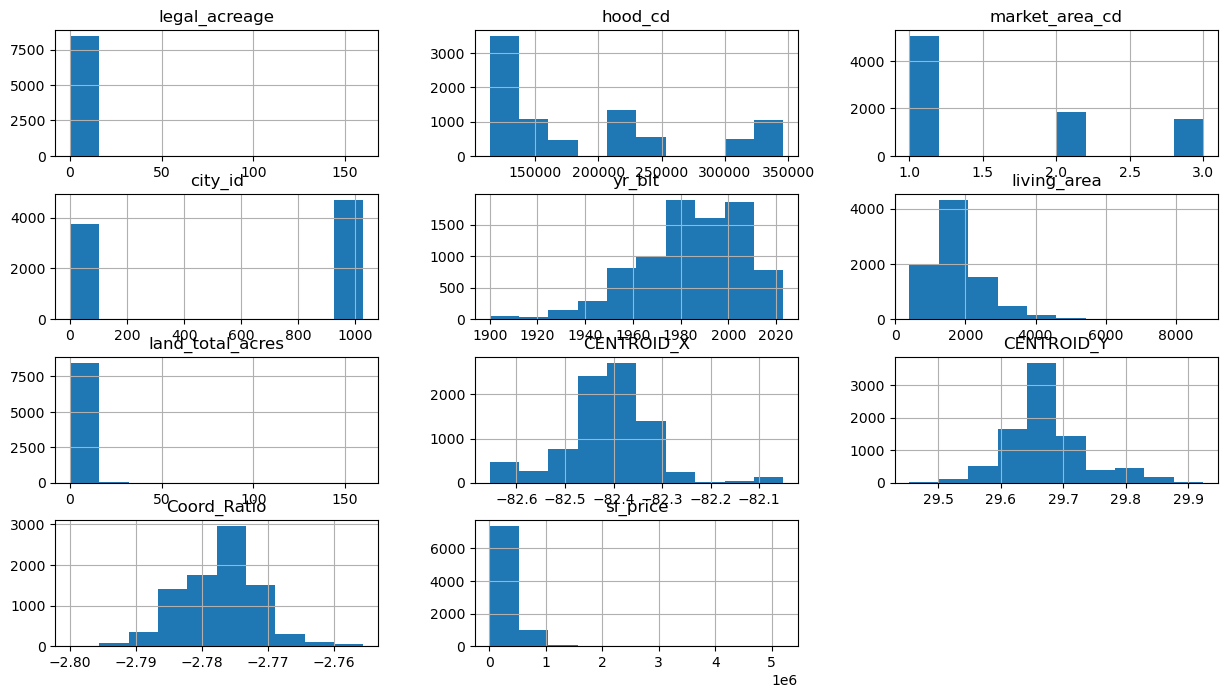

In [ ]:
# %%

train_data.hist(figsize =(15,8))

<Axes: >

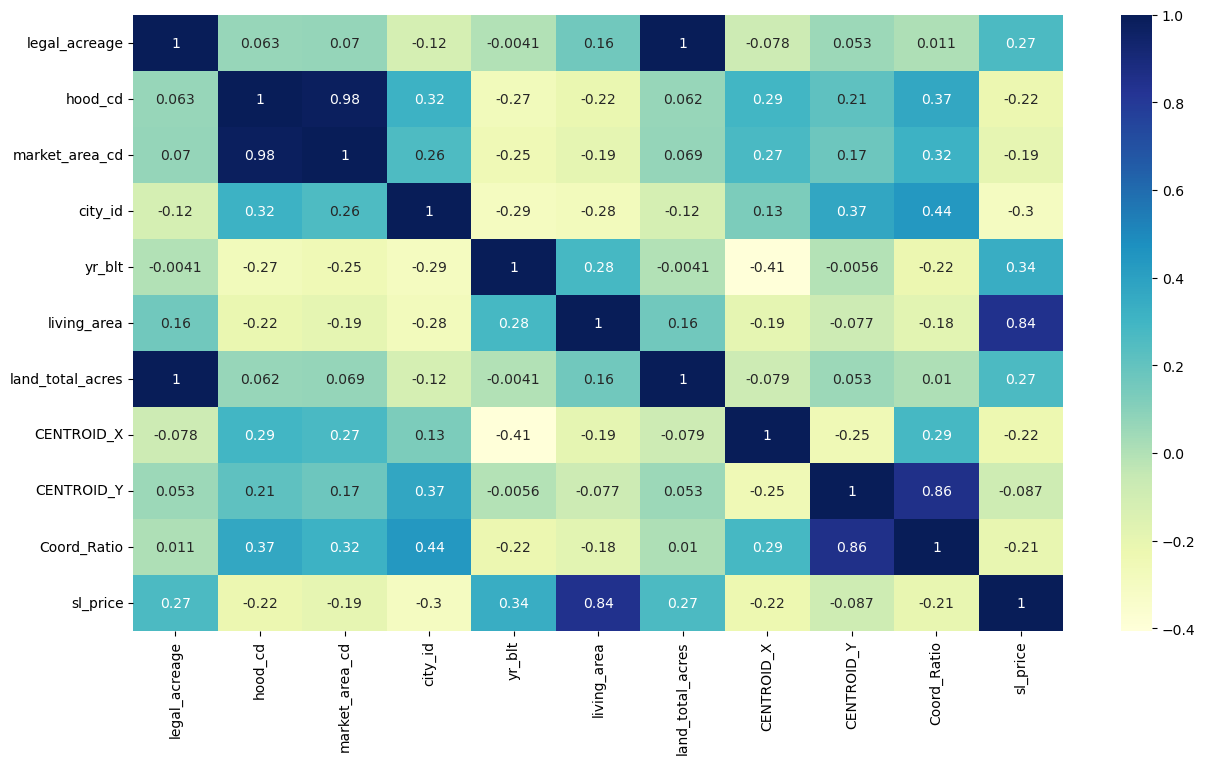

In [ ]:
# %%

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
# %%

train_data['legal_acreage'] = np.log(train_data['legal_acreage'] + 1)
train_data['sl_price'] = np.log(train_data['sl_price'] + 1)
train_data['living_area'] = np.log(train_data['living_area'] + 1)

array([[<Axes: title={'center': 'legal_acreage'}>,
        <Axes: title={'center': 'hood_cd'}>,
        <Axes: title={'center': 'market_area_cd'}>],
       [<Axes: title={'center': 'city_id'}>,
        <Axes: title={'center': 'yr_blt'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'land_total_acres'}>,
        <Axes: title={'center': 'CENTROID_X'}>,
        <Axes: title={'center': 'CENTROID_Y'}>],
       [<Axes: title={'center': 'Coord_Ratio'}>,
        <Axes: title={'center': 'sl_price'}>, <Axes: >]], dtype=object)

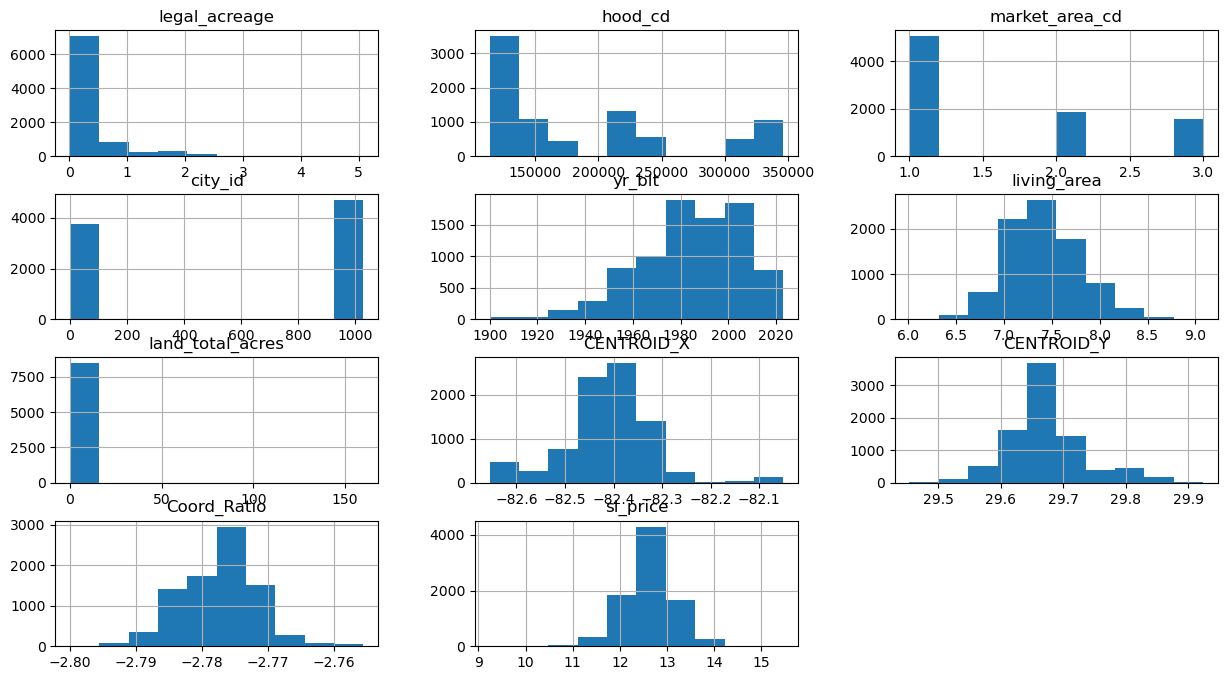

In [ ]:
# %%

train_data.hist(figsize=(15,8))